<a href="https://colab.research.google.com/github/SAMIHA-BGM/Handwritten-Digit-Classification-using-ANN-and-CNN-MNIST-Dataset-/blob/main/houseprediction_using_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [31]:
# Create sample house price data
np.random.seed(42)
years = np.arange(2000, 2020)
prices = np.array([50 + i*2 + np.random.randn()*2 for i in range(len(years))])

data = pd.DataFrame({
    'Year': years,
    'Price': prices
})

data.head()


,Year,Price
0,2000,50.993428
1,2001,51.723471
2,2002,55.295377
3,2003,59.046060
4,2004,57.531693


In [32]:
scaler = MinMaxScaler()
data['Price'] = scaler.fit_transform(data[['Price']])


In [33]:
TIME_STEPS = 5
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

prices_array = data['Price'].values
X, y = create_sequences(prices_array, TIME_STEPS)

X = X.reshape((X.shape[0], X.shape[1], 1))



In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [35]:
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=4,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - loss: 0.4318 - val_loss: 0.9733
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3754 - val_loss: 0.6553
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1880 - val_loss: 0.4617
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1495 - val_loss: 0.3149
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1117 - val_loss: 0.2089
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0740 - val_loss: 0.1301
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0442 - val_loss: 0.0748
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0238 - val_loss: 0.0361
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - val_loss: 0.0128
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0057 - val_loss: 0.0029
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047 - val_loss: 0.0065


In [37]:
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


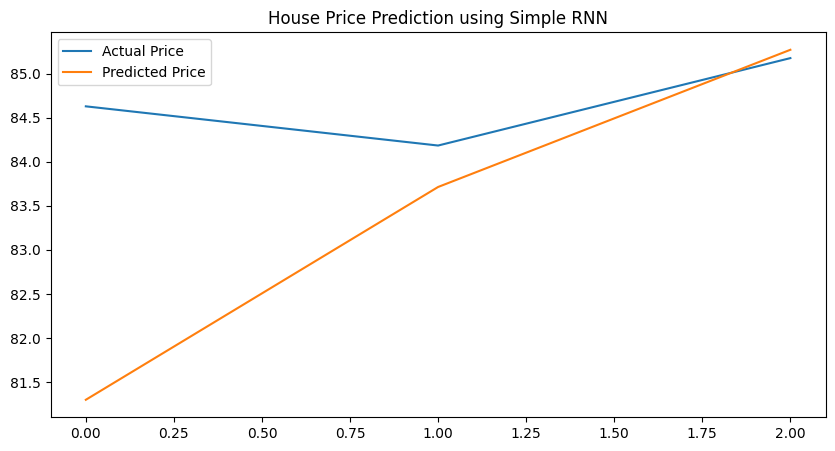

In [38]:
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.title('House Price Prediction using Simple RNN')
plt.show()
